In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow
# %matplotlib inline

In [3]:
def show(image):
    cv2.imshow("img", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [6]:
transA = cv2.imread("data/transA.jpg", 0)
transB = cv2.imread("data/transB.jpg", 0)
simA = cv2.imread("data/simA.jpg", 0)
simB = cv2.imread("data/simB.jpg", 0)

In [7]:
show(transB)

In [8]:
def gradients_all(img):
    ret = {}
    
    img = cv2.GaussianBlur(img, (5,5), sigmaX = 2)
    
    Ix = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = 5) #kernel_sum = 240
    Iy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize = 5)
    
    com_img = np.hstack((Ix,Iy))
    imshow(com_img, cmap='gray');
    
    Ixx = Ix * Ix
    Ixy = Ix * Iy
    Iyy = Iy * Iy
    
    ret = {
        "img": img,
        "Ix" : Ix,
        "Iy" : Iy,
        "Ixx": Ixx,
        "Ixy": Ixy,
        "Iyy": Iyy,
          }
    
    return ret

array([[  0., 138., 242., ...,  28.,   6.,   0.],
       [  0., 130., 231., ...,  23.,   4.,   0.],
       [  0., 112., 202., ...,  10.,  -2.,   0.],
       ...,
       [  0., -27., -50., ...,  47.,  31.,   0.],
       [  0., -12., -26., ..., 102.,  59.,   0.],
       [  0.,  -8., -18., ..., 128.,  72.,   0.]])

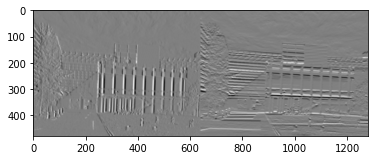

In [9]:
ret = gradients_all(transA)
ret["Ix"]

In [10]:
def non_max_suppression(res, offset = 1):
    
    h, w = res.shape
    
    for i in range(offset, h - offset):
        for j in range(offset, w - offset):
            b = res[i - offset: i + offset + 1, j - offset: j + offset + 1]
            m = b.max()
            b[b<m] = 0
    
    return res

In [12]:
def harris_response(parameters, k = 0.05, offset = 1):
    
    img = parameters["img"]
    Ixx = parameters["Ixx"]
    Ixy = parameters["Ixy"]
    Iyy = parameters["Iyy"]
    
#     detA = Ixx + Iyy - 2 * Ixy
    
#     traceA = Ixx + Iyy
    
#     response = detA - k * (traceA ** 2)
    
    h,w = parameters["img"].shape
    Sxx = np.zeros((h, w)) #(h - 2 * offset,w - 2 * offset)
    Sxy = np.zeros((h, w))
    Syy = np.zeros((h, w))
    
    for i in range(offset, h - offset):
        for j in range(offset, w - offset):
            Sxx[i, j] = np.sum(Ixx[i - offset: i + offset + 1, j - offset: j + offset + 1])
            Sxy[i, j] = np.sum(Ixy[i - offset: i + offset + 1, j - offset: j + offset + 1])
            Syy[i, j] = np.sum(Iyy[i - offset: i + offset + 1, j - offset: j + offset + 1])
    
#     mat = [
#              [Sxx, Sxy]
#              [Sxy, Syy]
#           ]
    
    
    det = Sxx * Syy - Sxy ** 2
    trace = Sxx + Syy
    
    res = det - k * (trace ** 2)
    img_corners = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    points = []
    
    #thresholding
    max_response = res.max()
    res[res < max_response * 0.01] = 0
    
    #non-max-suppression
    res = non_max_suppression(res, offset=2)
    
    
    for i in range(0,h):
        for j in range(0,w):
            if res[i, j] > 0: # response > 0 === corner
                img_corners[i, j] = [0, 255, 0]
                points.append([i,j])
    
    parameters["img_corners"] = img_corners
    parameters["corners"] = points
    parameters["response"] = res
    
    return parameters
    
    
    

In [13]:
parameters = harris_response(ret)

In [14]:
show(parameters["img_corners"])
show(parameters["img"])

In [13]:
# parameters["img_corners"]

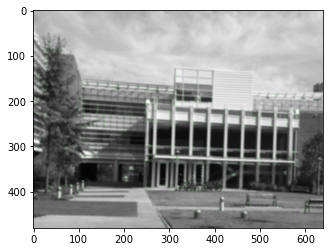

In [15]:
imshow(parameters["img_corners"]);

In [2]:
sift = cv2.xfeatures2d.SIFT_create()
# sift.de

AttributeError: module 'cv2.cv2' has no attribute 'xfeatures2d'

In [4]:
print('OpenCv Version:',cv2.__version__)

OpenCv Version: 4.2.0


In [3]:
sift = cv2.SIFT()
# sift.de

AttributeError: module 'cv2.cv2' has no attribute 'SIFT'